In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("placement.csv")
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


C:\Users\AMAN\AppData\Local\Temp\ipykernel_24544\3492486821.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["placement_exam_marks"])
C:\Users\AMAN\AppData\Local\Temp\ipykernel_24544\3492486821.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["cgpa"])


<Axes: xlabel='cgpa', ylabel='Density'>

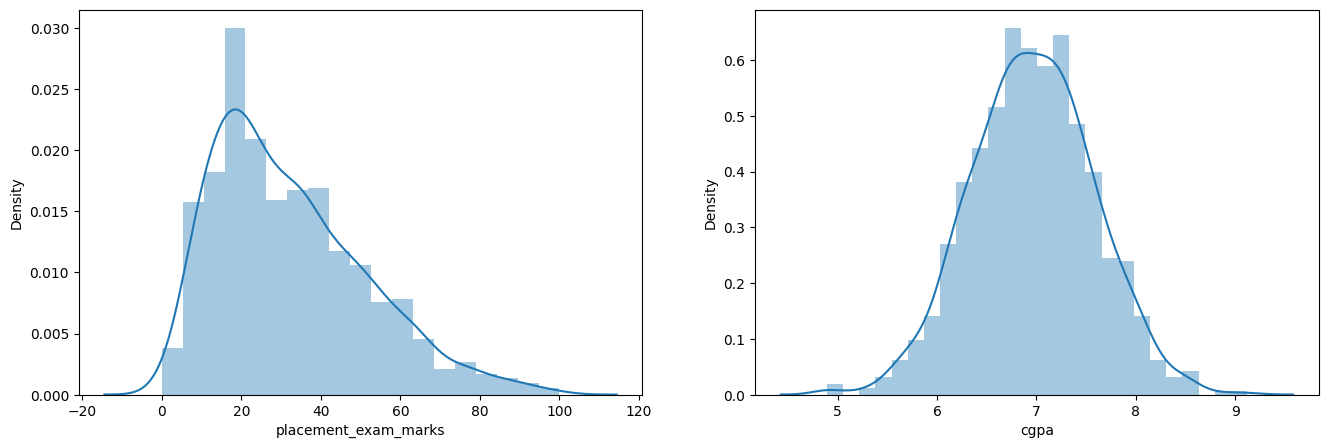

In [4]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df["placement_exam_marks"])

plt.subplot(1,2,2)
sns.distplot(df["cgpa"])


In [5]:
print("highest allowed:" , df["cgpa"].mean() + 3*df["cgpa"].std())
print("lowest allowed:" , df["cgpa"].mean() - 3*df["cgpa"].std())



highest allowed: 8.808933625397168
lowest allowed: 5.113546374602832


In [11]:

#  outliers removal

new_df = df[(df["cgpa"] < 8.80) & (df["cgpa"] > 5.11)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


<h3>Capping</h3>

In [12]:
upper_limit = df["cgpa"].mean() + 3*df["cgpa"].std()
lower_limit = df["cgpa"].mean() - 3*df["cgpa"].std()

In [13]:
df["cgpa"] =np.where(
df["cgpa"] > upper_limit,
upper_limit,np.where(
df["cgpa"] < lower_limit ,
lower_limit ,
df["cgpa"]
)
)